<a href="https://colab.research.google.com/github/KarbivnychyiVolodymyr/machine_learning/blob/main/%D0%9A%D0%B0%D1%80%D0%B1%D1%96%D0%B2%D0%BD%D0%B8%D1%87%D0%B8%D0%B9_%D0%BF%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.
Завантаження та підготовка даних:'''
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Display the first few rows of the dataset
print(X.head())
print(y.head())

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64


In [3]:
'''Побудова лінійної регресійної моделі'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Створення моделі лінійної регресії
model = LinearRegression()

# Навчання моделі на навчальних даних
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Середньоквадратична помилка: {mse}')
print(f'R^2 оцінка: {r2}')


Середньоквадратична помилка: 2900.193628493482
R^2 оцінка: 0.4526027629719195


In [4]:
'''Аналіз перенавчання'''
# Оцінка на навчальних даних
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Середньоквадратична помилка на навчальних даних: {train_mse}')
print(f'R^2 оцінка на навчальних даних: {train_r2}')


Середньоквадратична помилка на навчальних даних: 2868.549702835577
R^2 оцінка на навчальних даних: 0.5279193863361498


In [5]:
'''Запобігання перенавчанню (регуляризація)'''
from sklearn.linear_model import Ridge, Lasso

# Регресія з L2 регуляризацією (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print(f'Ridge Середньоквадратична помилка: {ridge_mse}')
print(f'Ridge R^2 оцінка: {ridge_r2}')

# Регресія з L1 регуляризацією (Lasso)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print(f'Lasso Середньоквадратична помилка: {lasso_mse}')
print(f'Lasso R^2 оцінка: {lasso_r2}')


Ridge Середньоквадратична помилка: 3077.41593882723
Ridge R^2 оцінка: 0.41915292635986545
Lasso Середньоквадратична помилка: 3403.5757216070733
Lasso R^2 оцінка: 0.3575918767219115


In [6]:
'''Крос-валідація'''
from sklearn.model_selection import cross_val_score

# Крос-валідація для Ridge
ridge_cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_mse = -ridge_cv_scores.mean()

# Крос-валідація для Lasso
lasso_cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_mse = -lasso_cv_scores.mean()

print(f'Ridge Крос-валідаційна середньоквадратична помилка: {ridge_cv_mse}')
print(f'Lasso Крос-валідаційна середньоквадратична помилка: {lasso_cv_mse}')


Ridge Крос-валідаційна середньоквадратична помилка: 3420.32407441944
Lasso Крос-валідаційна середньоквадратична помилка: 3850.8384890613015


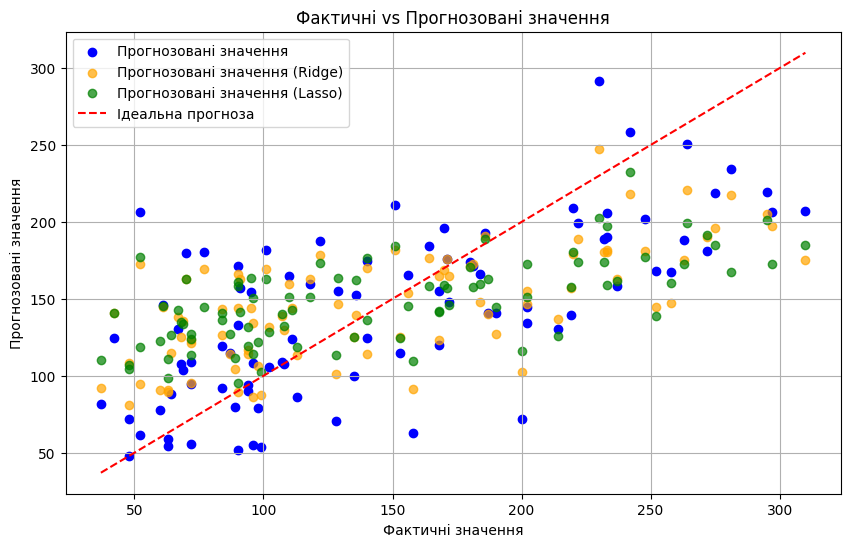

In [7]:
'''Візуалізація'''
import matplotlib.pyplot as plt

# Візуалізація фактичних та прогнозованих значень для лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Прогнозовані значення')
plt.scatter(y_test, ridge_y_pred, color='orange', label='Прогнозовані значення (Ridge)', alpha=0.7)
plt.scatter(y_test, lasso_y_pred, color='green', label='Прогнозовані значення (Lasso)', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ідеальна прогноза')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Фактичні vs Прогнозовані значення')
plt.legend()
plt.grid()
plt.show()


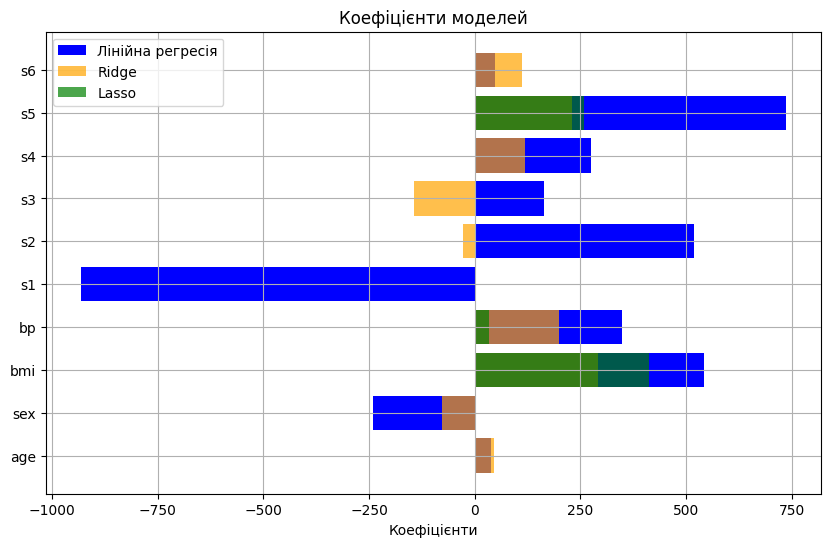

In [8]:
# Візуалізація коефіцієнтів моделей
plt.figure(figsize=(10, 6))
features = X.columns
plt.barh(features, model.coef_, color='blue', label='Лінійна регресія')
plt.barh(features, ridge.coef_, color='orange', label='Ridge', alpha=0.7)
plt.barh(features, lasso.coef_, color='green', label='Lasso', alpha=0.7)
plt.xlabel('Коефіцієнти')
plt.title('Коефіцієнти моделей')
plt.legend()
plt.grid()
plt.show()


In [ ]:
'''У результаті лабораторної роботи було вивчено три моделі: лінійну регресію,
Ridge і Lasso. Регуляризація виявилася ефективною для покращення продуктивності
моделей, зменшуючи ризик перенавчання та забезпечуючи кращі прогнози. Аналіз
результатів показав, що моделі з регуляризацією демонструють вищу точність на
тестових даних. Використання крос-валідації дозволило отримати більш надійні
оцінки продуктивності моделей, знижуючи ризик випадкових відхилень. Загалом,
робота підтвердила важливість застосування методів регуляризації та
крос-валідації для досягнення високих результатів у машинному навчанні.'''

In [10]:
'''Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.'''
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Завантаження датасету Diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Вивід перших кількох рядків датасету
print(X.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


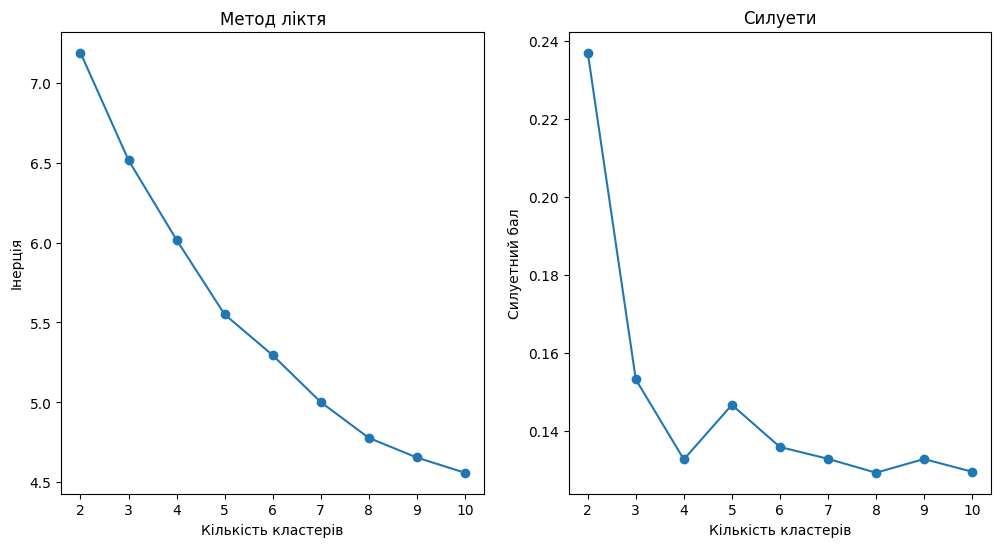

In [11]:
# Метод ліктя
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Візуалізація
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Силуети')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')
plt.show()


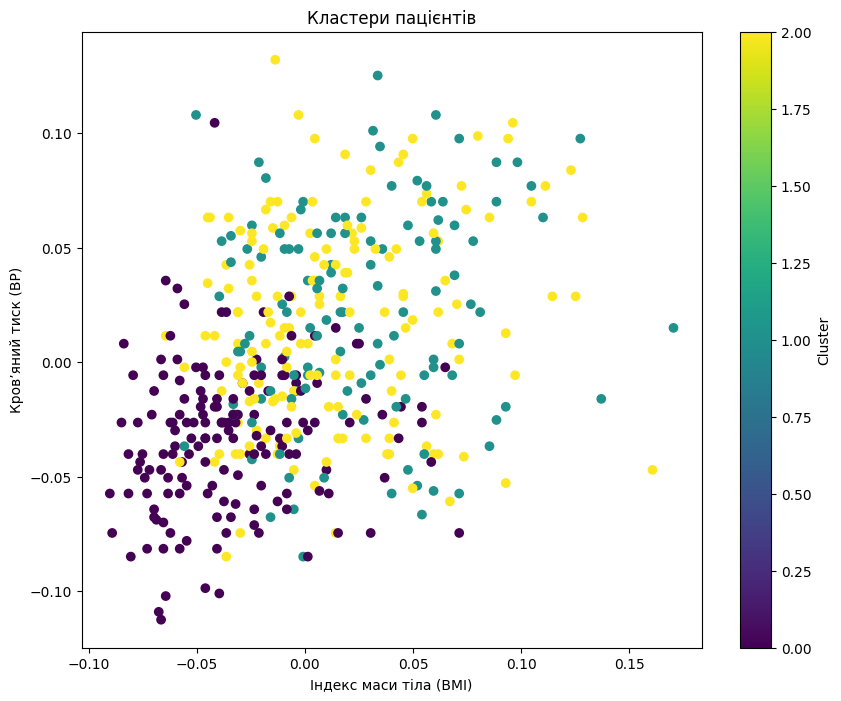

In [12]:
# Кластеризація за допомогою KMeans
optimal_k = 3  # Припустимо, ми визначили 3 кластери
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Додавання кластерів до датасету
X['Cluster'] = clusters

# Візуалізація кластерів
plt.figure(figsize=(10, 8))
plt.scatter(X['bmi'], X['bp'], c=X['Cluster'], cmap='viridis')
plt.title('Кластери пацієнтів')
plt.xlabel('Індекс маси тіла (BMI)')
plt.ylabel('Кров’яний тиск (BP)')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
'''У результаті виконаної кластеризації даних було виявлено кілька кластерів,
що показують різні групи пацієнтів за критеріями індексу маси тіла та
кров'яного тиску. Метод ліктя та силуетний аналіз допомогли визначити
оптимальну кількість кластерів, що дозволило отримати корисні інсайти з
даних про діабет.'''